C:\Users\MISSIONERS\AppData\Local\Temp\ipykernel_9772\507816692.py:64: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_rgb = imageio.imread('../IMAGENES/lena128C.png') / 255.  # Normalizamos la imagen a valores entre 0 y 1


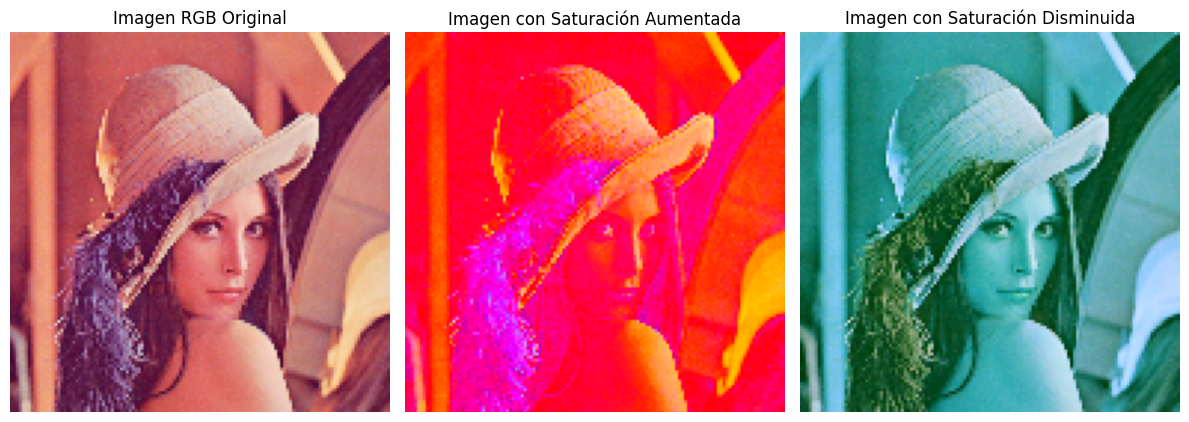

In [16]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

def RGB2YIQ(img):
    # Asegurarse de que la imagen tenga 3 canales (sin canal alfa)
    if img.shape[2] == 4:
        img = img[:, :, :3]  # Eliminar el canal alfa si está presente

    # Crear una imagen YIQ vacía
    yiq = np.zeros(img.shape)
    
    # Aplicar la transformación RGB a YIQ
    yiq[:,:,0] = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]  # Luminancia (Y)
    yiq[:,:,1] = 0.596*img[:,:,0] - 0.274*img[:,:,1] - 0.322*img[:,:,2]  # Crominancia I
    yiq[:,:,2] = 0.211*img[:,:,0] - 0.523*img[:,:,1] + 0.312*img[:,:,2]  # Crominancia Q
    
    return yiq

def YIQ2RGB(yiq):
    # Definir la matriz de transformación inversa de YIQ a RGB
    transform_matrix_inv = np.array([
        [1.0, 0.956, 0.621],
        [1.0, -0.272, -0.647],
        [1.0, -1.106, 1.703]
    ])
    
    # Asegurarse de que la imagen esté en el rango [0, 1]
    yiq = yiq.astype(np.float64)
    
    # Aplicar la transformación inversa
    rgb = np.dot(yiq.reshape(-1, 3), transform_matrix_inv.T)
    
    # Volver a dar forma a la imagen RGB
    h, w, c = yiq.shape
    rgb = rgb.reshape((h, w, 3))
    
    # Asegurarse de que los valores estén en el rango [0, 1]
    rgb = np.clip(rgb, 0, 1)
    
    return rgb

def ajustar_saturacion(img_rgb, factor):
    
    # Convertir de RGB a YIQ
    yiq = RGB2YIQ(img_rgb)
    
    # Ajustar la saturación en el espacio YIQ
    yiq[:,:,1] = np.clip(yiq[:,:,1] * factor, -1, 1)  # Ajustar crominancia I
    yiq[:,:,2] = np.clip(yiq[:,:,2] * factor, -1, 1)  # Ajustar crominancia Q
    
    # Convertir de YIQ de vuelta a RGB
    img_rgb_adjusted = YIQ2RGB(yiq)
    
    return img_rgb_adjusted

# Cargar la imagen RGB
img_rgb = imageio.imread('../IMAGENES/lena128C.png') / 255.  # Normalizamos la imagen a valores entre 0 y 1
saturacionMayor = 5
saturacionMenor = -1
# Ajustar la saturación (factor > 1 aumenta la saturación, factor < 1 la disminuye)
img_rgb_saturated = ajustar_saturacion(img_rgb, saturacionMayor)  # Aumentar la saturación
img_rgb_desaturated = ajustar_saturacion(img_rgb, saturacionMenor)  # Disminuir la saturación

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

# Imagen original en RGB
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Imagen RGB Original')
plt.axis('off')

# Imagen con saturación aumentada
plt.subplot(1, 3, 2)
plt.imshow(img_rgb_saturated)
plt.title('Imagen con Saturación Aumentada')
plt.axis('off')

# Imagen con saturación disminuida
plt.subplot(1, 3, 3)
plt.imshow(img_rgb_desaturated)
plt.title('Imagen con Saturación Disminuida')
plt.axis('off')

plt.tight_layout()
plt.show()

C:\Users\MISSIONERS\AppData\Local\Temp\ipykernel_9772\2048634209.py:57: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_rgb = imageio.imread('../IMAGENES/lena128C.png') / 255.  # Normalizamos la imagen a valores entre 0 y 1


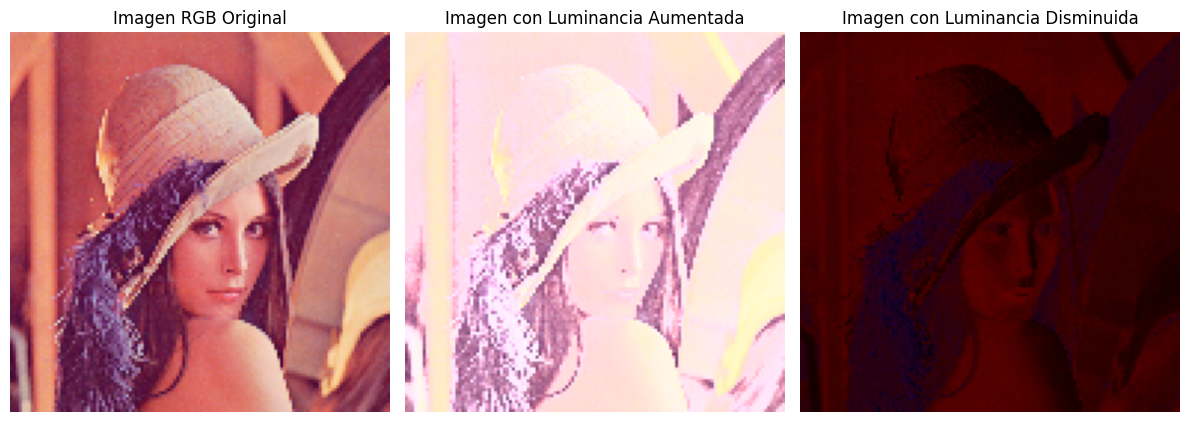

In [15]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

def RGB2YIQ(img):
    # Asegurarse de que la imagen tenga 3 canales (sin canal alfa)
    if img.shape[2] == 4:
        img = img[:, :, :3]  # Eliminar el canal alfa si está presente

    # Crear una imagen YIQ vacía
    yiq = np.zeros(img.shape)
    
    # Aplicar la transformación RGB a YIQ
    yiq[:,:,0] = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]  # Luminancia (Y)
    yiq[:,:,1] = 0.596*img[:,:,0] - 0.274*img[:,:,1] - 0.322*img[:,:,2]  # Crominancia I
    yiq[:,:,2] = 0.211*img[:,:,0] - 0.523*img[:,:,1] + 0.312*img[:,:,2]  # Crominancia Q
    
    return yiq

def YIQ2RGB(yiq):
    # Definir la matriz de transformación inversa de YIQ a RGB
    transform_matrix_inv = np.array([
        [1.0, 0.956, 0.621],
        [1.0, -0.272, -0.647],
        [1.0, -1.106, 1.703]
    ])
    
    # Asegurarse de que la imagen esté en el rango [0, 1]
    yiq = yiq.astype(np.float64)
    
    # Aplicar la transformación inversa
    rgb = np.dot(yiq.reshape(-1, 3), transform_matrix_inv.T)
    
    # Volver a dar forma a la imagen RGB
    h, w, c = yiq.shape
    rgb = rgb.reshape((h, w, 3))
    
    # Asegurarse de que los valores estén en el rango [0, 1]
    rgb = np.clip(rgb, 0, 1)
    
    return rgb

def ajustar_luminancia(img_rgb, factor):
   
    # Convertir de RGB a YIQ
    yiq = RGB2YIQ(img_rgb)
    
    # Ajustar la luminancia (canal Y)
    yiq[:,:,0] = np.clip(yiq[:,:,0] * factor, 0, 1)  # Asegurarse de que la luminancia esté en el rango [0, 1]
    
    # Convertir de YIQ de vuelta a RGB
    img_rgb_adjusted = YIQ2RGB(yiq)
    
    return img_rgb_adjusted

# Cargar la imagen RGB
img_rgb = imageio.imread('../IMAGENES/lena128C.png') / 255.  # Normalizamos la imagen a valores entre 0 y 1
luminanciaMayor=3
luminanciaMenor=-3
# Ajustar la luminancia (factor > 1 aumenta la luminancia, factor < 1 la disminuye)
img_rgb_brightened = ajustar_luminancia(img_rgb, luminanciaMayor)  # Aumentar la luminancia
img_rgb_darkened = ajustar_luminancia(img_rgb, luminanciaMenor)  # Disminuir la luminancia

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

# Imagen original en RGB
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Imagen RGB Original')
plt.axis('off')

# Imagen con luminancia aumentada
plt.subplot(1, 3, 2)
plt.imshow(img_rgb_brightened)
plt.title('Imagen con Luminancia Aumentada')
plt.axis('off')

# Imagen con luminancia disminuida
plt.subplot(1, 3, 3)
plt.imshow(img_rgb_darkened)
plt.title('Imagen con Luminancia Disminuida')
plt.axis('off')

plt.tight_layout()
plt.show()




c:\Users\MISSIONERS\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


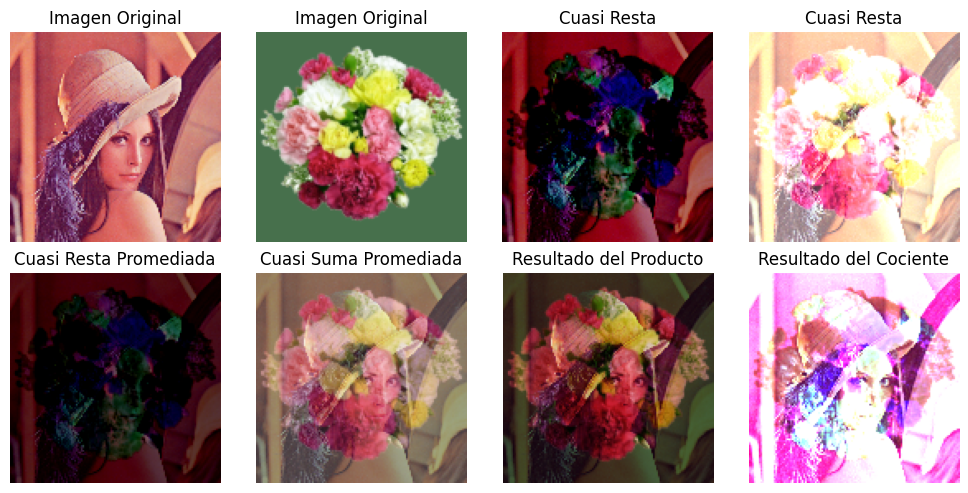

In [4]:
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt
from skimage.transform import resize

imgFlores=imageio.imread('../IMAGENES/flores.png')/255
imgMujer=imageio.imread('../IMAGENES/lena128C.png')/255

# Función para eliminar el canal alfa
def eliminar_canal_alfa(img):
    if img.shape[2] == 4:  # Verificar si la imagen tiene un canal alfa (RGBA)
        img_rgb = img[:, :, :3]  # Extraer solo los canales RGB
        return img_rgb
    return img  # Si no tiene canal alfa, retornar la imagen sin cambios

canal_alfa=eliminar_canal_alfa(imgMujer)
imgFloresRezise=resize(imgFlores,canal_alfa.shape)


# Función para realizar la cuasi resta entre dos imágenes
def cuasi_resta(img1, img2):
    # Restar los valores de los píxeles de las dos imágenes
    resta = img1 - img2
    # Clampeo: asegurar que los valores estén en el rango [0, 1]
    resta_clampeada = np.clip(resta, 0, 1)
    return resta_clampeada

# Aplicar la cuasi resta a las dos imágenes
resultado_cuasi_resta = cuasi_resta(canal_alfa, imgFloresRezise)


def cuasi_suma(img1, img2):
    # Sumar los valores de los píxeles de las dos imágenes
    suma = img1 + img2
    # Clampeo: asegurar que los valores estén en el rango [0, 1]
    suma_clampeada = np.clip(suma, 0, 1)
    return suma_clampeada


resultado_cuasi_suma=cuasi_suma(canal_alfa,imgFloresRezise)

def cuasi_resta_promediada(img1, img2):
    # Restar los valores de los píxeles de las dos imágenes
    resta = img1 - img2
    # Promediar el resultado
    promedio = resta / 2
    # Clampeo: asegurar que los valores estén en el rango [0, 1]
    resultado_clampeado = np.clip(promedio, 0, 1)
    return resultado_clampeado

# Aplicar la cuasi resta promediada a las dos imágenes
resultado_cuasi_resta_promediada = cuasi_resta_promediada(canal_alfa, imgFloresRezise)

# Función para realizar la cuasi suma promediada entre dos imágenes
def cuasi_suma_promediada(img1, img2):
    # Sumar los valores de los píxeles de las dos imágenes
    suma = img1 + img2
    # Promediar el resultado dividiendo la suma por 2
    promedio = suma / 2
    # Clampeo: asegurar que los valores estén en el rango [0, 1]
    resultado_clampeado = np.clip(promedio, 0, 1)
    return resultado_clampeado

# Aplicar la cuasi suma promediada a las dos imágenes
resultado_cuasi_suma_promediada = cuasi_suma_promediada(canal_alfa, imgFloresRezise)


# Función para realizar el producto entre dos imágenes
def producto(img1, img2):
    # Multiplicar los valores de los píxeles de las dos imágenes
    producto = img1 * img2
    # Clampeo: asegurar que los valores estén en el rango [0, 1]
    resultado_clampeado = np.clip(producto, 0, 1)
    return resultado_clampeado

# Aplicar el producto a las dos imágenes
resultado_producto = producto(canal_alfa, imgFloresRezise)


# Función para realizar el cociente entre dos imágenes
def cociente(img1, img2):
    # Evitar la división por cero: agregar un pequeño valor (epsilon) al divisor
    epsilon = 1e-10
    img2 = np.clip(img2, epsilon, None)  # Clampeo para evitar valores cero
    # Dividir los valores de los píxeles de img1 entre los valores de img2
    cociente = img1 / img2
    # Clampeo: asegurar que los valores estén en el rango [0, 1]
    resultado_clampeado = np.clip(cociente, 0, 1)
    return resultado_clampeado

# Aplicar el cociente a las dos imágenes
resultado_cociente = cociente(canal_alfa, imgFloresRezise)


# Mostrar las imágenes originales y el resultado
plt.figure(figsize=(10, 5))

# Imagen 1
plt.subplot(2, 4, 1)
plt.imshow(canal_alfa)
plt.title('Imagen Original')
plt.axis('off')

# Imagen 2 redimensionada
plt.subplot(2, 4, 2)
plt.imshow(imgFloresRezise)
plt.title('Imagen Original')
plt.axis('off')

# Resultado de la cuasi resta
plt.subplot(2, 4, 3)
plt.imshow(resultado_cuasi_resta)
plt.title('Cuasi Resta')
plt.axis('off')


#Resultado de la cuasi suma
plt.subplot(2, 4, 4)
plt.imshow(resultado_cuasi_suma)
plt.title('Cuasi Resta')
plt.axis('off')


# Resultado de la cuasi resta promediada
plt.subplot(2, 4, 5)
plt.imshow(resultado_cuasi_resta_promediada)
plt.title('Cuasi Resta Promediada')
plt.axis('off')

# Resultado de la cuasi suma promediada
plt.subplot(2, 4, 6)
plt.imshow(resultado_cuasi_suma_promediada)
plt.title('Cuasi Suma Promediada')
plt.axis('off')


# Resultado del producto
plt.subplot(2, 4, 7)
plt.imshow(resultado_producto)
plt.title('Resultado del Producto')
plt.axis('off')

# Resultado del cociente
plt.subplot(2, 4, 8)
plt.imshow(resultado_cociente)
plt.title('Resultado del Cociente')
plt.axis('off')



plt.tight_layout()
plt.show()


c:\Users\MISSIONERS\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


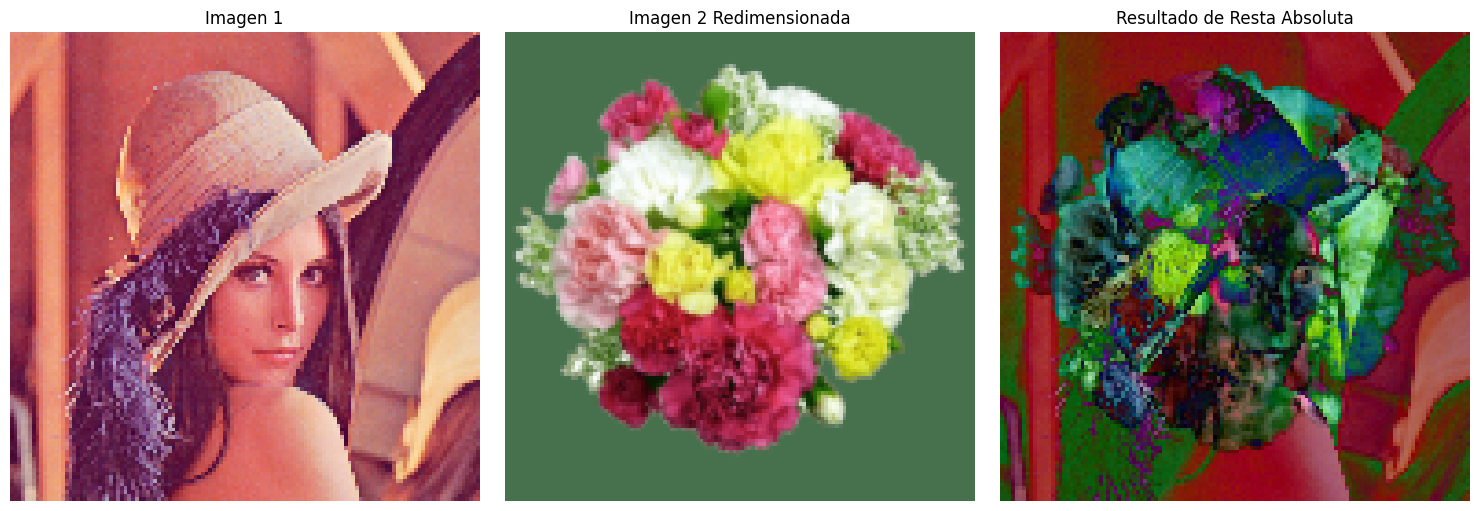

In [6]:
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt
from skimage.transform import resize

# Cargar imágenes (normalizadas a [0, 1])
img1 = imageio.imread('../IMAGENES/flores.png') / 255.0
img2 = imageio.imread('../IMAGENES/lena128C.png') / 255.0

# Función para eliminar el canal alfa
def eliminar_canal_alfa(img):
    if img.shape[2] == 4:  # Verificar si la imagen tiene un canal alfa (RGBA)
        img_rgb = img[:, :, :3]  # Extraer solo los canales RGB
        return img_rgb
    return img  # Si no tiene canal alfa, retornar la imagen sin cambios

canal_alfa=eliminar_canal_alfa(img2)
imgFloresRezise=resize(img1,canal_alfa.shape)

# Función para realizar la resta con valor absoluto entre dos imágenes
def resta_valor_absoluto(img1, img2):
    # Restar los valores de los píxeles de img2 de los valores de img1
    resta = img1 - img2
    # Tomar el valor absoluto de la resta
    resultado_absoluto = np.abs(resta)
    # Clampeo: asegurar que los valores estén en el rango [0, 1]
    resultado_clampeado = np.clip(resultado_absoluto, 0, 1)
    return resultado_clampeado

# Aplicar la resta con valor absoluto a las dos imágenes
resultado_resta_absoluta = resta_valor_absoluto(canal_alfa, imgFloresRezise)

# Mostrar las imágenes originales y el resultado
plt.figure(figsize=(15, 5))

# Imagen 1
plt.subplot(1, 3, 1)
plt.imshow(canal_alfa)
plt.title('Imagen 1')
plt.axis('off')

# Imagen 2 redimensionada
plt.subplot(1, 3, 2)
plt.imshow(imgFloresRezise)
plt.title('Imagen 2 Redimensionada')
plt.axis('off')

# Resultado de la resta con valor absoluto
plt.subplot(1, 3, 3)
plt.imshow(resultado_resta_absoluta)
plt.title('Resultado de Resta Absoluta')
plt.axis('off')

plt.tight_layout()
plt.show()


c:\Users\MISSIONERS\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


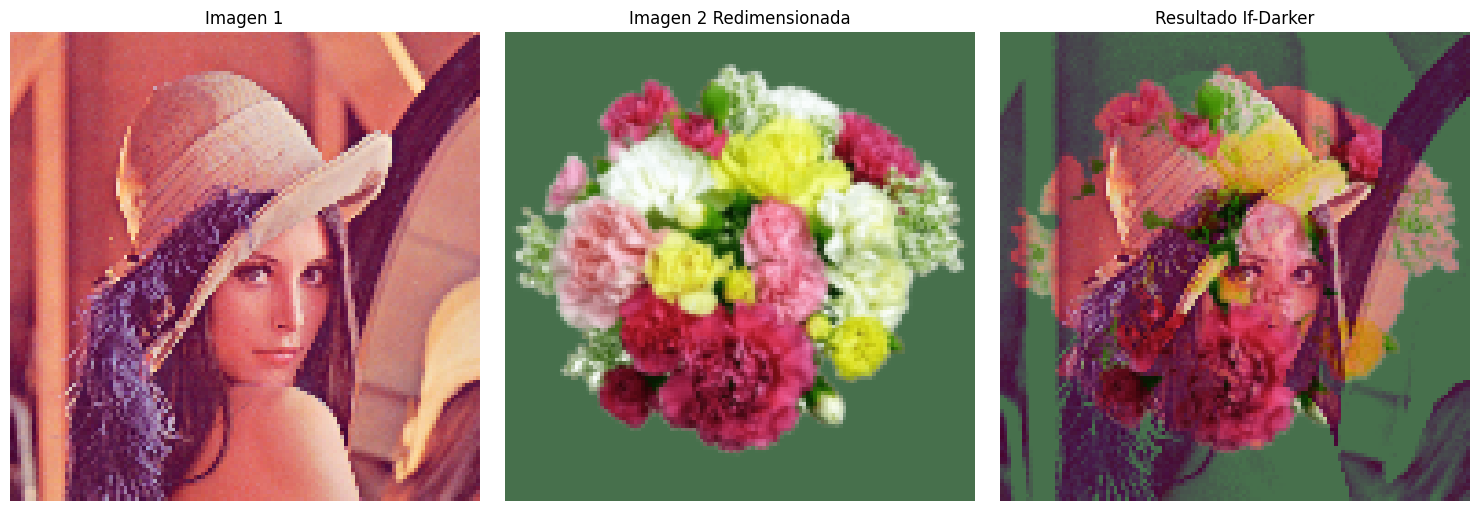

In [12]:
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt
from skimage.transform import resize

# Cargar imágenes (normalizadas a [0, 1])
img1 = imageio.imread('../IMAGENES/flores.png') / 255.0
img2 = imageio.imread('../IMAGENES/lena128C.png') / 255.0

# Función para eliminar el canal alfa
def eliminar_canal_alfa(img):
    if img.shape[2] == 4:  # Verificar si la imagen tiene un canal alfa (RGBA)
        img_rgb = img[:, :, :3]  # Extraer solo los canales RGB
        return img_rgb
    return img  # Si no tiene canal alfa, retornar la imagen sin cambios

canal_alfa=eliminar_canal_alfa(img2)

imgFloresRezise=resize(img1,canal_alfa.shape)

# Función para aplicar la operación "if-darker"
def if_darker(img1, img2):
    # Comparar los píxeles de img1 y img2, seleccionando el más oscuro (menor valor)
    return np.minimum(img1, img2)

# Aplicar la operación "if-darker"
resultado_if_darker = if_darker(canal_alfa, imgFloresRezise)

# Mostrar las imágenes originales y el resultado
plt.figure(figsize=(15, 5))

# Imagen 1
plt.subplot(1, 3, 1)
plt.imshow(canal_alfa)
plt.title('Imagen 1')
plt.axis('off')

# Imagen 2 redimensionada
plt.subplot(1, 3, 2)
plt.imshow(imgFloresRezise)
plt.title('Imagen 2 Redimensionada')
plt.axis('off')

# Resultado de la operación "if-darker"
plt.subplot(1, 3, 3)
plt.imshow(resultado_if_darker)
plt.title('Resultado If-Darker')
plt.axis('off')

plt.tight_layout()
plt.show()


c:\Users\MISSIONERS\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


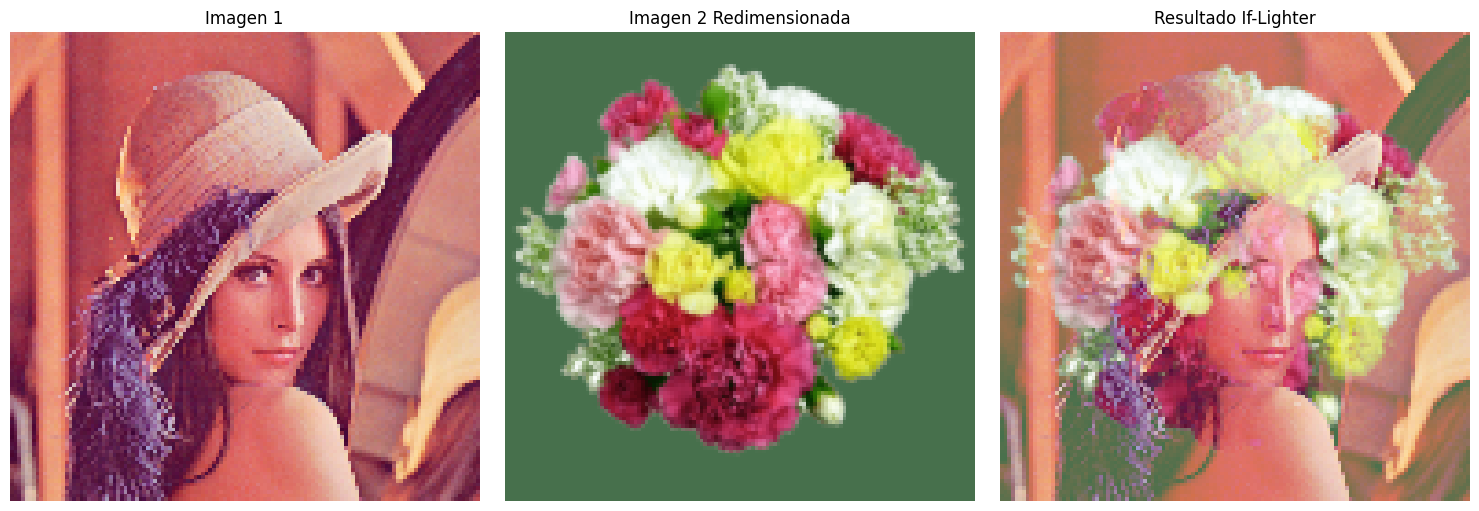

In [11]:
import numpy as np
import imageio.v3 as imageio 
import matplotlib.pyplot as plt
from skimage.transform import resize

# Cargar imágenes (normalizadas a [0, 1])
img1 = imageio.imread('../IMAGENES/flores.png') / 255.0
img2 = imageio.imread('../IMAGENES/lena128C.png') / 255.0

# Función para eliminar el canal alfa
def eliminar_canal_alfa(img):
    if img.shape[2] == 4:  # Verificar si la imagen tiene un canal alfa (RGBA)
        img_rgb = img[:, :, :3]  # Extraer solo los canales RGB
        return img_rgb
    return img  # Si no tiene canal alfa, retornar la imagen sin cambios

canal_alfa=eliminar_canal_alfa(img2)
imgFloresRezise=resize(img1,canal_alfa.shape)

# Función para aplicar la operación "if-lighter"
def if_lighter(img1, img2):
    # Comparar los píxeles de img1 y img2, seleccionando el más claro (mayor valor)
    return np.maximum(img1, img2)

# Aplicar la operación "if-lighter"
resultado_if_lighter = if_lighter(canal_alfa, imgFloresRezise)

# Mostrar las imágenes originales y el resultado
plt.figure(figsize=(15, 5))

# Imagen 1
plt.subplot(1, 3, 1)
plt.imshow(canal_alfa)
plt.title('Imagen 1')
plt.axis('off')

# Imagen 2 redimensionada
plt.subplot(1, 3, 2)
plt.imshow(imgFloresRezise)
plt.title('Imagen 2 Redimensionada')
plt.axis('off')

# Resultado de la operación "if-lighter"
plt.subplot(1, 3, 3)
plt.imshow(resultado_if_lighter)
plt.title('Resultado If-Lighter')
plt.axis('off')

plt.tight_layout()
plt.show()
